In [216]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

https://www.kaggle.com/c/bike-sharing-demand/data

```
datetime - hourly date + timestamp  
season - 
    1 = spring, 
    2 = summer, 
    3 = fall, 
    4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

In [207]:
train = pd.read_csv('data/train.csv.gz', compression='gzip')
train.datetime = pd.to_datetime(train.datetime)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [208]:
train['hour'] = train['datetime'].apply(lambda row: row.hour)
train['day'] = train['datetime'].apply(lambda row: row.day)
train['month'] = train['datetime'].apply(lambda row: row.month)
train['year'] = train['datetime'].apply(lambda row: row.year)
train['weekday'] = train['datetime'].apply(lambda row: row.weekday())
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011,5


In [178]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
year          10886 non-null int64
weekday       10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13)
memory usage: 1.4 MB


In [179]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.001729,0.971524,-0.004797,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,-0.015877,0.001731,0.012021,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,0.009829,-0.003394,-0.002482,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.007890,0.012144,-0.012548,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.015551,0.257589,0.061226,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.011866,0.264173,0.058540,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.011335,0.204537,-0.078606,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,0.036157,-0.150192,-0.015221,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.014109,0.092722,0.145241,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.019111,0.169451,0.264265,-0.084427


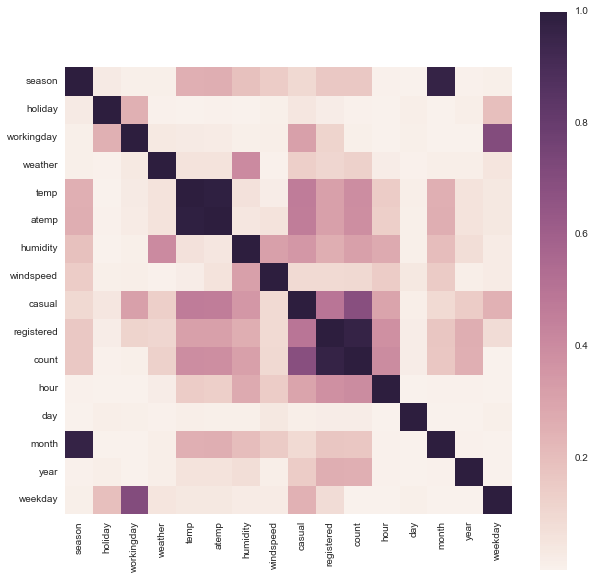

In [180]:
plt.subplots(figsize=(10,10))
sns.heatmap(np.abs(train.corr()), square=True)

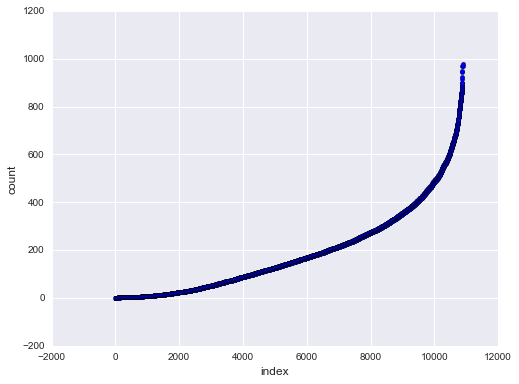

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['count'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

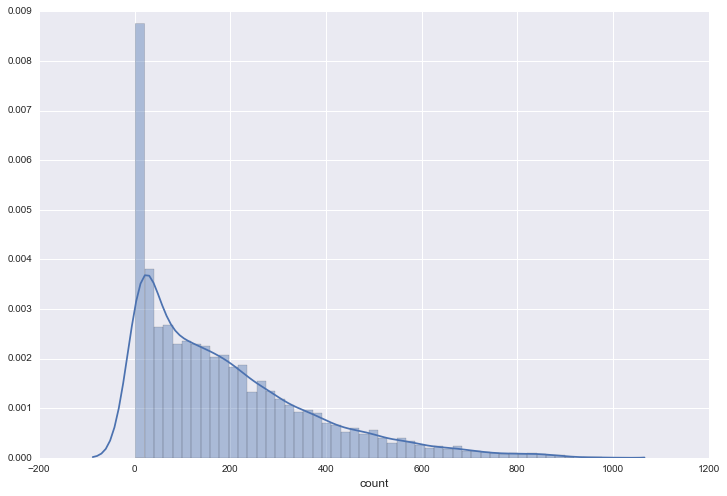

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(train['count'].values, bins=50, kde=True)
plt.xlabel('count', fontsize=12)
plt.show()

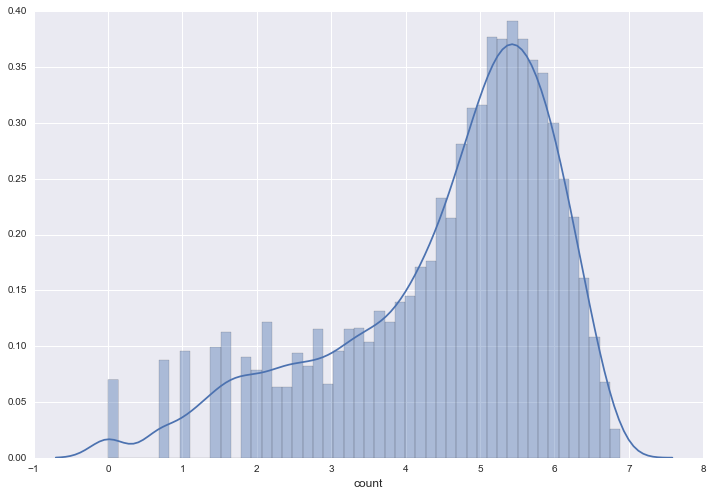

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(train['count'].values), bins=50, kde=True)
plt.xlabel('count', fontsize=12)
plt.show()

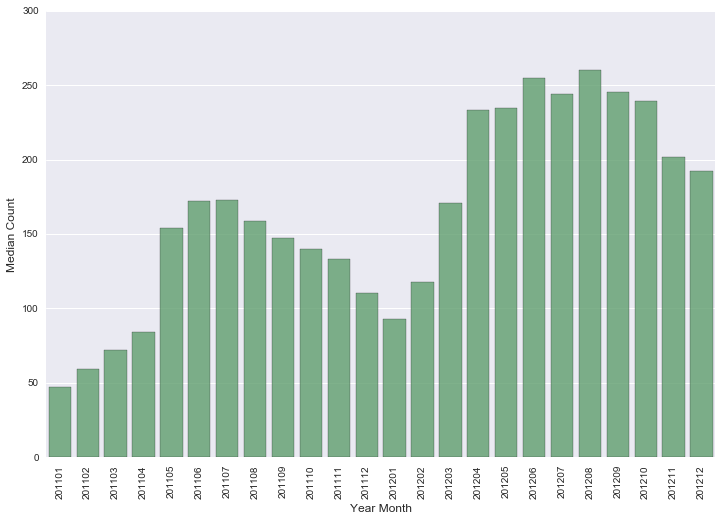

In [45]:
tmp = pd.DataFrame(index=train.index)
tmp['count'] = train['count']
tmp['year_month'] = train['year'] * 100 + train['month']
group_by_year_month = tmp.groupby('year_month')['count'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(group_by_year_month['year_month'].values, group_by_year_month['count'].values, alpha=0.8, color=color[1])
plt.ylabel('Median Count', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

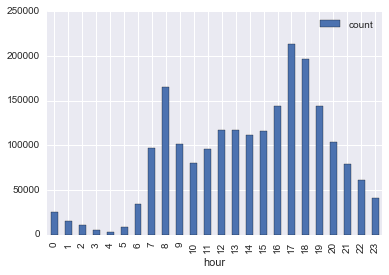

In [175]:
train[['count', 'hour']].groupby(['hour']).sum().plot(kind='bar')

        count
season       
1        2686
2        2733
3        2733
4        2734


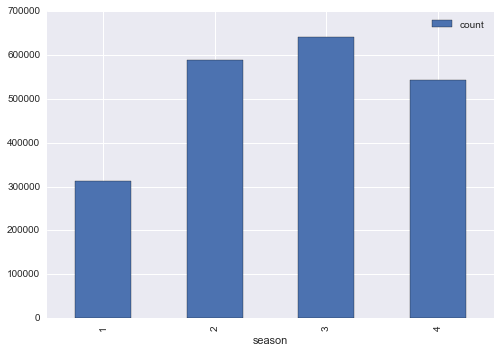

In [27]:
print(train[['count', 'season']].groupby(['season']).count())
train[['count', 'season']].groupby(['season']).sum().plot(kind='bar')

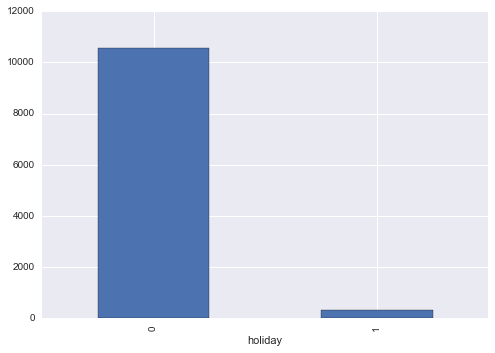

In [43]:
# посмотрим сколько всего записей с праздниками. Маловато!
train.groupby(['holiday'])['count'].count().plot(kind='bar')

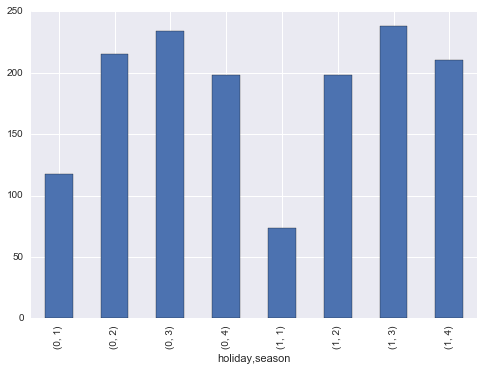

In [36]:
train.groupby(['holiday', 'season'])['count'].mean().plot(kind='bar')

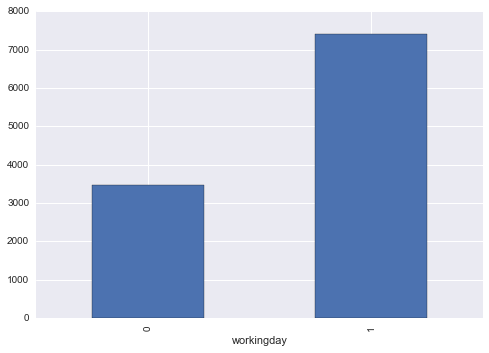

In [44]:
train.groupby(['workingday'])['count'].count().plot(kind='bar')

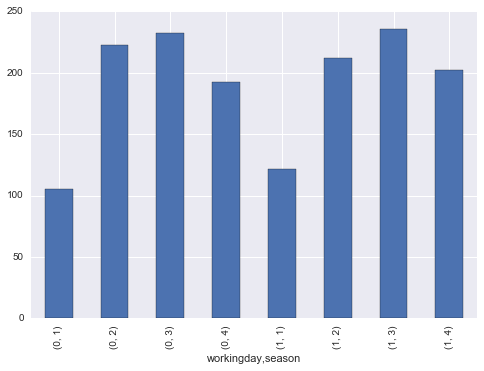

In [48]:
train.groupby(['workingday', 'season'])['count'].mean().plot(kind='bar')

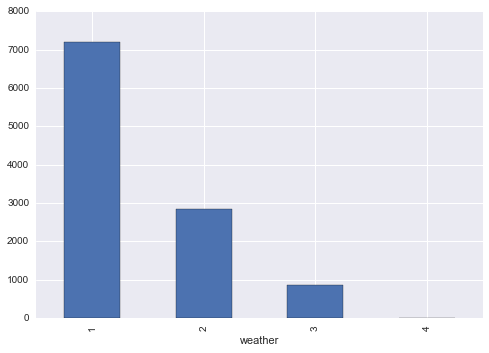

In [50]:
train.groupby(['weather'])['count'].count().plot(kind='bar')

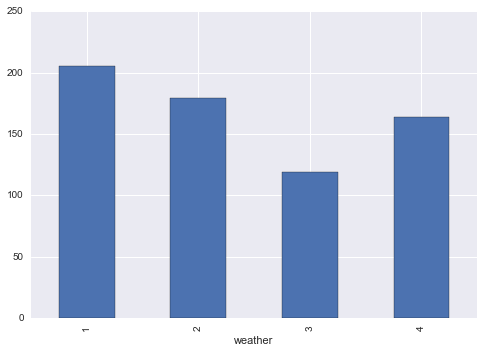

In [59]:
train.groupby(['weather'])['count'].mean().plot(kind='bar')

In [61]:
# Странные люди!!
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


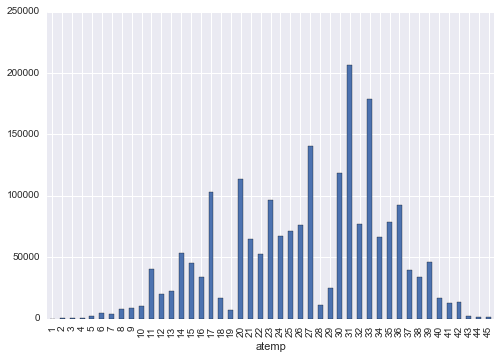

In [139]:
hist = pd.DataFrame(index=train.index)
hist['atemp'] = train.apply(lambda row: int(np.round(row['atemp'])), axis=1)
hist['count'] = train['count']
hist.groupby(['atemp'])['count'].sum().plot(kind='bar')

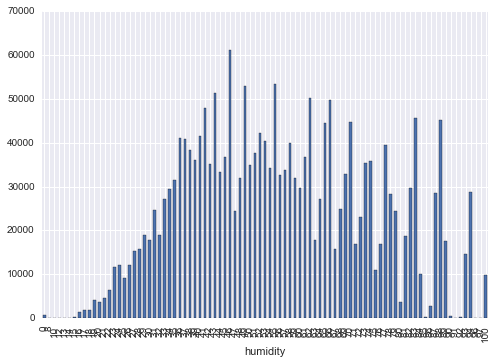

In [141]:
train.groupby(['humidity'])['count'].sum().plot(kind='bar')

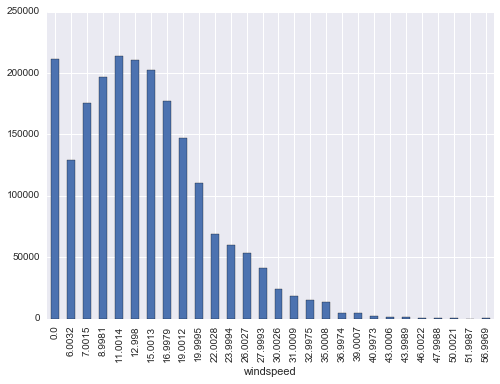

In [145]:
train.groupby(['windspeed'])['count'].sum().plot(kind='bar')

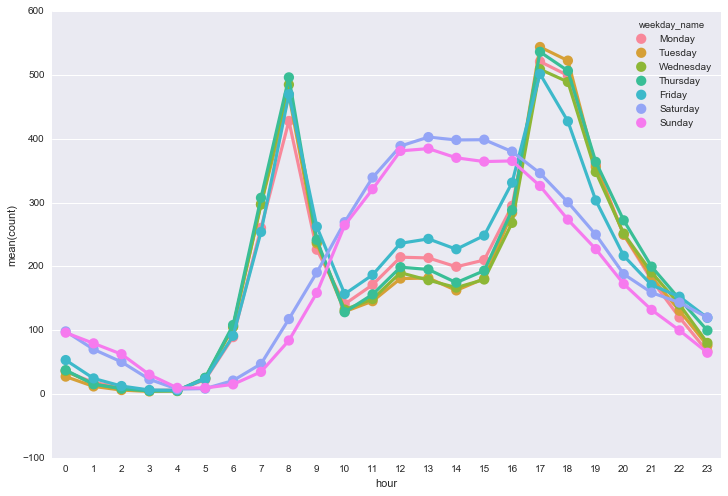

In [443]:
plt.figure(figsize=(12,8))
agg = pd.DataFrame(train.groupby(['hour', 'weekday'])['count'].mean().reset_index())
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday", "Sunday"]
agg['weekday_name'] = agg['weekday'].apply(lambda w: weekday[w])
sns.pointplot(x='hour', y='count', hue='weekday_name', data=agg)

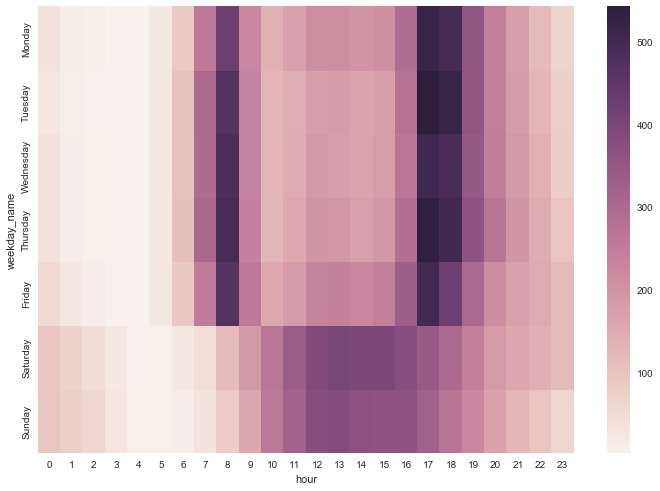

In [444]:
plt.figure(figsize=(12,8))
sns.heatmap(agg.pivot(index='weekday_name', columns='hour', values='count'))

In [438]:
hours = range(0, 24)
weeks = range(0, 7)
pairs = [w*len(hours) + h for h in hours for w in weeks]
print(len(hours) * len(weeks))
np.unique(pairs).size

168


168

# Select features

In [134]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y = train['count']

# Metrics

In [87]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

The RMSLE is calculated as

$$
\epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$

Where:

\\(\epsilon\\) is the RMSLE value (score)

\\(n\\) is the total number of observations in the (public/private) data set,

\\(p_i\\) is your prediction, and

\\(a_i\\) is the actual response  for  \\(i\\). 

\\(\log(x)\\) is the natural logarithm of \\(x\\)

In [484]:
def rmsle(y, y_):
    print(y_.min(), y_.max())
    log1 = np.nan_to_num(np.log1p(y))
    log2 = np.nan_to_num(np.log1p(y_))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Dummy prediction

In [94]:
from sklearn.dummy import DummyRegressor

score = cross_val_score(DummyRegressor(strategy='median'), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

174.0
138.0
154.0
129.0
130.0


-1.4939176284469264

# Baseline

In [84]:
score = cross_val_score(linear_model.Lasso(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-49.851619425
83.1824939022
-61.4557299306
10.5295125312
3.61937515405


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-1.4673475983411266

In [85]:
score = cross_val_score(linear_model.Ridge(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-52.3187855916
83.8519703966
-64.6502840273
9.02339502483
-3.43617459564


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-1.4709112281439749

In [89]:
score = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

5.9955952381
9.35092857143
4.364
14.5283333333
7.7525


-1.4159469128471633

# Visualize prediction

In [102]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [142]:
rmsle(pred, y_test.values)

1


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


1.4309524170609644

In [490]:
prediction = pd.DataFrame()
prediction['pred'] = pred
prediction['actual'] = y_test.values
prediction['error'] = prediction['pred'] - prediction['actual']
prediction['error_rate'] = prediction['error'] / prediction['actual']
prediction.head()

,pred,actual,error,error_rate
0,318.075731,127,191.075731,1.504533
1,51.691778,13,38.691778,2.976291
2,180.733288,163,17.733288,0.108793
3,280.706349,233,47.706349,0.204748
4,258.820730,222,36.820730,0.165859


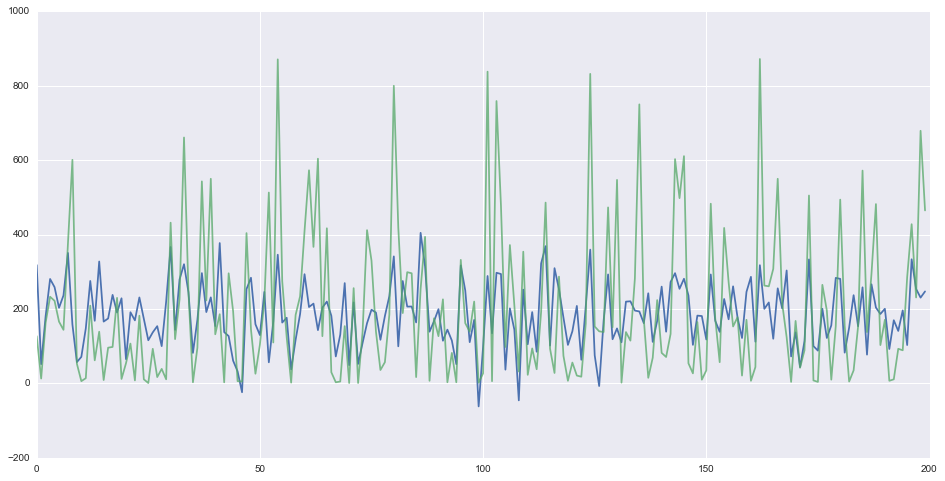

In [144]:
plt.figure(figsize=(16,8))
plt.plot(prediction['pred'][:200])
plt.plot(prediction['actual'][:200], alpha=0.75)

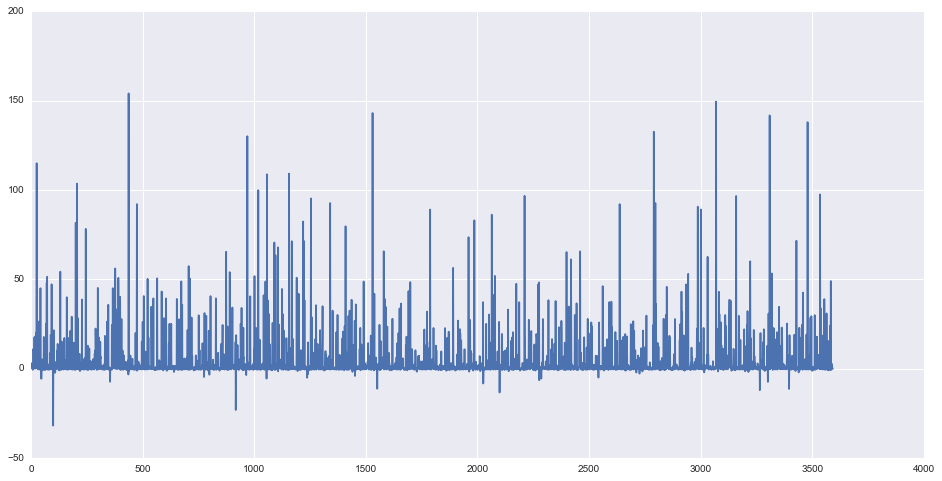

In [145]:
plt.figure(figsize=(16,8))
plt.plot(prediction['error_rate'])

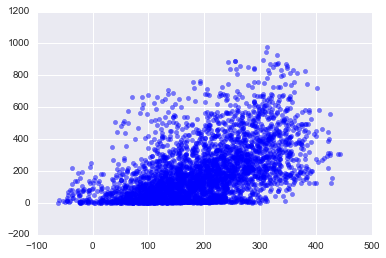

In [494]:
plt.scatter(prediction['pred'], prediction['actual'], alpha=0.5, color='blue')

# Feature engineering

In [146]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'day', 'month', 'year'],
      dtype='object')

In [181]:
X = train[['weekday','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year']]
y = train['count']

In [182]:
score = cross_val_score(linear_model.Lasso(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-171.933190246
-11.2661504628
-37.3389729218
43.8472441468
62.8896730012


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-1.3548919895158293

In [183]:
score = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

1.75
3.25
1.39
2.39
2.99


-0.47537602378381988

In [164]:
def describeImportance(clf, X):
    indices = np.argsort(clf.feature_importances_)[::-1]
    for f in range(X.shape[1]):
        print('%d. feature %d %s (%f)' % (f + 1, indices[f], X.columns[indices[f]],
                                          clf.feature_importances_[indices[f]]))
        
def describeCoeff(clf, X):
    indices = np.argsort(clf.coef_)[::-1]
    for f in range(X.shape[1]):
        print('%d. feature %d %s (%f)' % (f + 1, indices[f], X.columns[indices[f]],
                                          clf.coef_[indices[f]]))

In [184]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)

describeImportance(clf, X)

1. feature 9 hour (0.604878)
2. feature 12 year (0.086885)
3. feature 5 temp (0.073307)
4. feature 3 workingday (0.049112)
5. feature 11 month (0.047731)
6. feature 0 weekday (0.040221)
7. feature 6 atemp (0.030933)
8. feature 7 humidity (0.027012)
9. feature 4 weather (0.014277)
10. feature 10 day (0.009807)
11. feature 8 windspeed (0.007102)
12. feature 1 season (0.006343)
13. feature 2 holiday (0.002393)


In [185]:
clf = linear_model.Lasso()
clf.fit(X, y)

describeCoeff(clf, X)

1. feature 12 year (78.586779)
2. feature 9 hour (7.727972)
3. feature 11 month (7.434312)
4. feature 6 atemp (4.515246)
5. feature 5 temp (1.837487)
6. feature 8 windspeed (0.542355)
7. feature 10 day (0.352699)
8. feature 0 weekday (0.276515)
9. feature 3 workingday (0.000000)
10. feature 2 holiday (-0.000000)
11. feature 1 season (-0.000000)
12. feature 4 weather (-1.673002)
13. feature 7 humidity (-2.091709)


## Categorial features

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
year          10886 non-null int64
weekday       10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(13)
memory usage: 1.4 MB


In [241]:
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
train['weekday'] = train['weekday'].astype('category')
train['year'] = train['year'].astype('category')
train['month'] = train['month'].astype('category')
train['hour'] = train['hour'].astype('category')
train['day'] = train['day'].astype('category')
train['holiday'] = train['holiday'].astype('bool')
train['workingday'] = train['workingday'].astype('bool')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null bool
workingday    10886 non-null bool
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null category
day           10886 non-null category
month         10886 non-null category
year          10886 non-null category
weekday       10886 non-null category
dtypes: bool(2), category(7), datetime64[ns](1), float64(3), int64(4)
memory usage: 776.7 KB


In [242]:
train_dummy = pd.get_dummies(train, columns=['season', 'weather', 'hour', 'day', 'month', 'year', 'weekday'])
train_dummy.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month_12,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,False,False,9.84,14.395,81,0.0,3,13,16,...,0,1,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,False,False,9.02,13.635,80,0.0,8,32,40,...,0,1,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,False,False,9.02,13.635,80,0.0,5,27,32,...,0,1,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,False,False,9.84,14.395,75,0.0,3,10,13,...,0,1,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,False,False,9.84,14.395,75,0.0,0,1,1,...,0,1,0,0,0,0,0,0,1,0


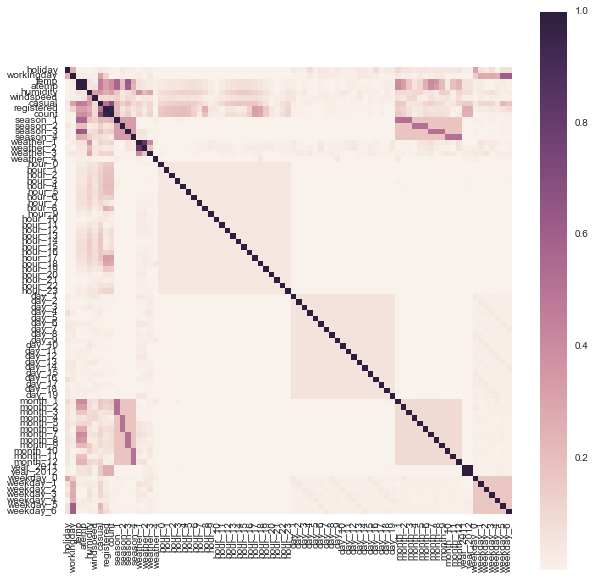

In [243]:
plt.subplots(figsize=(10,10))
sns.heatmap(np.abs(train_dummy.corr()), square=True)

In [244]:
X = train_dummy.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = train_dummy['count']

In [246]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']
X_scaled = X.copy()
scaler = StandardScaler()
# for col in numerical_columns:
#     X_scaled[col] = scaler.fit_transform(X[col])
# X_scaled
X_scaled[numerical_columns]= scaler.fit_transform(X.ix[:, numerical_columns])
X_scaled.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,...,month_12,year_2011,year_2012,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,False,False,-1.333661,-1.092737,0.993213,-1.567754,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,False,False,-1.438907,-1.182421,0.941249,-1.567754,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,False,False,-1.438907,-1.182421,0.941249,-1.567754,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,False,False,-1.333661,-1.092737,0.681430,-1.567754,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,False,False,-1.333661,-1.092737,0.681430,-1.567754,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [253]:
score = cross_val_score(linear_model.Lasso(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-198.638342343
-71.3378416647


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-87.0021306095
16.9615556276


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


26.6107262194


-1.1270885471471526

In [255]:
clf = linear_model.Lasso()
clf.fit(X, y)

describeCoeff(clf, X)

1. feature 31 hour_17 (216.554344)
2. feature 32 hour_18 (185.295691)
3. feature 22 hour_8 (165.309492)
4. feature 33 hour_19 (79.133889)
5. feature 30 hour_16 (57.417064)
6. feature 9 season_4 (38.969120)
7. feature 21 hour_7 (24.728374)
8. feature 65 month_9 (14.148094)
9. feature 23 hour_9 (12.030482)
10. feature 61 month_5 (12.019135)
11. feature 26 hour_12 (10.501357)
12. feature 2 temp (4.057718)
13. feature 3 atemp (2.872217)
14. feature 27 hour_13 (2.781028)
15. feature 76 weekday_5 (2.467547)
16. feature 10 weather_1 (1.395757)
17. feature 34 hour_20 (0.512404)
18. feature 70 year_2012 (0.000000)
19. feature 39 day_2 (-0.000000)
20. feature 40 day_3 (0.000000)
21. feature 35 hour_21 (-0.000000)
22. feature 41 day_4 (0.000000)
23. feature 38 day_1 (-0.000000)
24. feature 29 hour_15 (0.000000)
25. feature 28 hour_14 (0.000000)
26. feature 25 hour_11 (-0.000000)
27. feature 43 day_6 (0.000000)
28. feature 24 hour_10 (-0.000000)
29. feature 13 weather_4 (-0.000000)
30. feature 11 

In [250]:
X = train.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = train['count']

score = cross_val_score(RandomForestRegressor(n_estimators=50), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

1.56
3.18
1.24
2.4
2.54


-0.47697786934087477

In [251]:
X = train_dummy.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = train_dummy['count']

score = cross_val_score(RandomForestRegressor(n_estimators=50), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

1.82
2.96
1.86
3.92
2.66


-0.68246082742875669

# TSNE

In [261]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [259]:
print(X.shape)
tsne = TSNE(n_components=2, init='pca')
X_little = tsne.fit_transform(X_scaled)
print(X_little.shape)

(10886, 78)
(10886, 2)


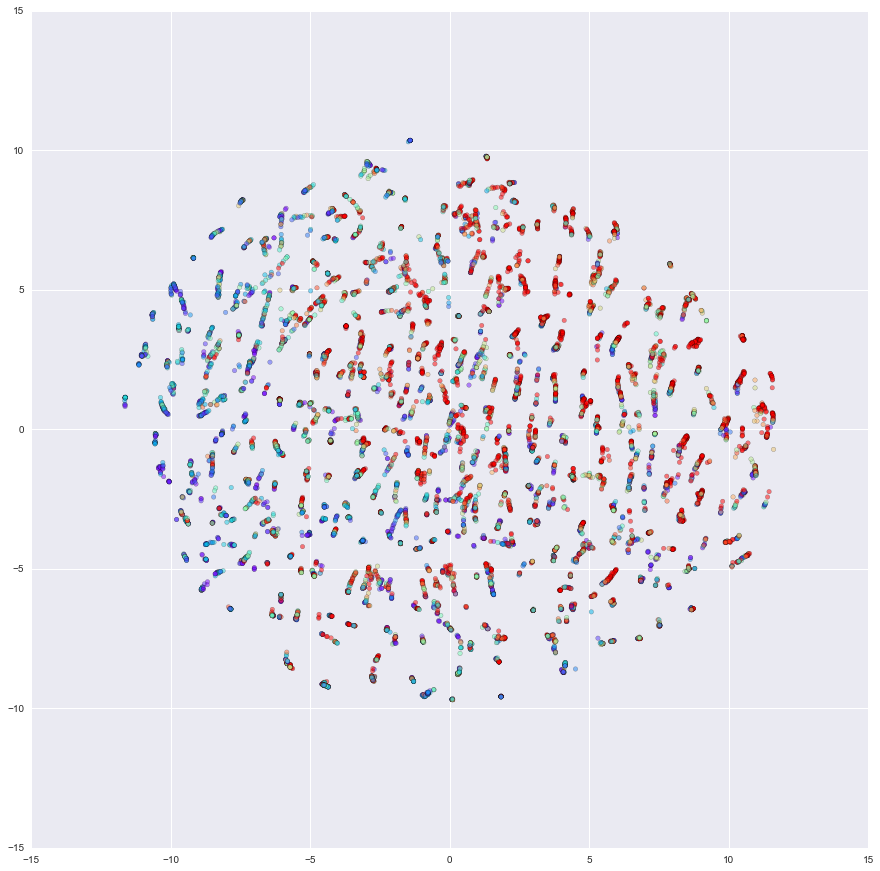

In [270]:
plt.subplots(figsize=(15,15))
plt.scatter(X_little[:,0], X_little[:,1], c=cm.rainbow(y), alpha=0.5)

In [278]:
X = train.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = train['count']

X = pd.concat([pd.DataFrame(X_little, index=X.index), X], axis=1)

score = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

1.52
3.36
1.5
2.52
2.6


-0.493422494982312

# Fill missing data

Seems wind speed is wrong - a lot of 0's.

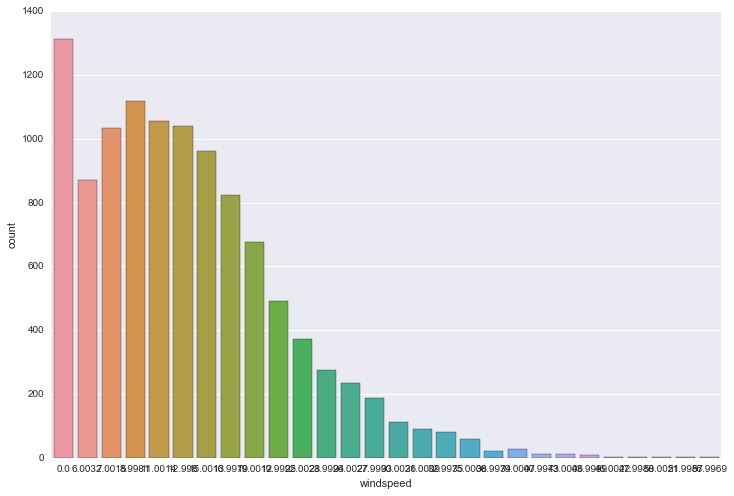

In [333]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, x='windspeed')

In [340]:
print(train[train['windspeed'] == 0].shape[0])
print(train[train['windspeed'] != 0].shape[0])

1313
9573


In [378]:
from sklearn.ensemble import GradientBoostingRegressor

wind_features = ["season","weather","humidity","month","temp","year","atemp"]
data_wind_0 = train[train['windspeed'] == 0]
data_wind_not_0 = train[train['windspeed'] != 0]

score = cross_val_score(GradientBoostingRegressor(n_estimators=100), data_wind_not_0[wind_features], data_wind_not_0['windspeed'], scoring='neg_mean_squared_error')
score.mean()

-36.780512693614384

In [379]:
reg = GradientBoostingRegressor(n_estimators=100)
reg.fit(data_wind_not_0[wind_features], data_wind_not_0['windspeed'])
wind_speed = reg.predict(data_wind_0[wind_features])

In [410]:
ws = pd.DataFrame(index=data_wind_0.index)
ws['windspeed'] = wind_speed

train['windspeed'] = np.round(pd.concat([ws['windspeed'], data_wind_not_0['windspeed']]), 0)

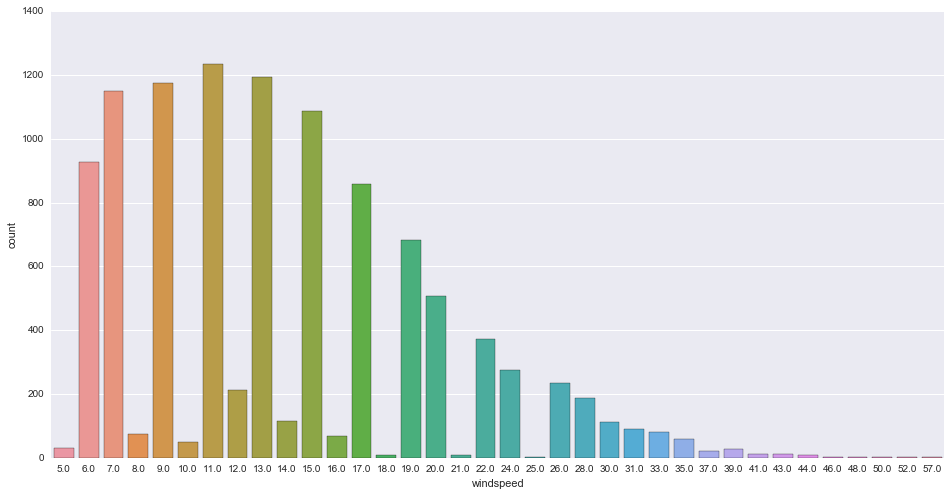

In [413]:
plt.figure(figsize=(16,8))
sns.countplot(data=train, x='windspeed')

In [414]:
X = train.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = train['count']

score = cross_val_score(RandomForestRegressor(n_estimators=50), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

1.48
3.3
1.32
2.34
2.46


-0.47597881554322419

In [485]:
train['weekday_hour'] = train['weekday'].astype(int) * 24 + train['hour'].astype(int)
train['humidity_temp'] = train['humidity'] * train['temp'] * train['windspeed']
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year,weekday,weekday_hour,humidity_temp
0,2011-01-01 00:00:00,1,False,False,1,9.84,14.395,81,5.0,3,13,16,0,1,1,2011,5,120,3985.2
1,2011-01-01 01:00:00,1,False,False,1,9.02,13.635,80,7.0,8,32,40,1,1,1,2011,5,121,5051.2
2,2011-01-01 02:00:00,1,False,False,1,9.02,13.635,80,7.0,5,27,32,2,1,1,2011,5,122,5051.2
3,2011-01-01 03:00:00,1,False,False,1,9.84,14.395,75,6.0,3,10,13,3,1,1,2011,5,123,4428.0
4,2011-01-01 04:00:00,1,False,False,1,9.84,14.395,75,6.0,0,1,1,4,1,1,2011,5,124,4428.0


In [486]:
trainWithoutOutliers = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())]

In [495]:
X = trainWithoutOutliers.drop(['count', 'casual', 'registered', 'datetime'], axis=1)
y = trainWithoutOutliers['count']

score = cross_val_score(RandomForestRegressor(n_estimators=50), X, y, cv=5, scoring='neg_mean_absolute_error')
score.mean()

-47.479432032397213

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = RandomForestRegressor(n_estimators=50)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

1.38 686.4
0.345649316214


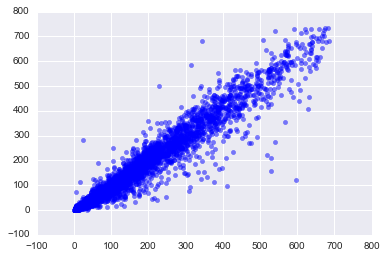

In [502]:
print(rmsle(y_test, pred))
plt.scatter(pred, y_test, alpha=0.5, color='blue')